# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('base_modulo_7.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   sexo                                      16650 non-null  int64  
 1   posse_de_veiculo                          16650 non-null  int64  
 2   posse_de_imovel                           16650 non-null  int64  
 3   qtd_filhos                                16650 non-null  int64  
 4   idade                                     16650 non-null  float64
 5   tempo_emprego                             16650 non-null  float64
 6   possui_celular                            16650 non-null  int64  
 7   possui_fone_comercial                     16650 non-null  int64  
 8   possui_fone                               16650 non-null  int64  
 9   possui_email                              16650 non-null  int64  
 10  qt_pessoas_residencia             

In [4]:
x = df.drop('mau', axis=1)
y = df['mau']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [6]:
x_train.shape

(11655, 32)

In [7]:
y_train.shape

(11655,)

In [8]:
x_test.shape

(4995, 32)

In [9]:
y_test.shape

(4995,)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train, y_train)


[Text(0.6236132008293561, 0.9814814814814815, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovados'),
 Text(0.3730788604833427, 0.9444444444444444, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Aprovados'),
 Text(0.23736116472487367, 0.9074074074074074, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Aprovados'),
 Text(0.06513194834362718, 0.8703703703703703, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Aprovados'),
 Text(0.049410443571027515, 0.8333333333333334, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = Aprovados'),
 Text(0.035934868051656375, 0.7962962962962963, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = Aprovados'),
 Text(0.017967434025828188, 0.7592592592592593, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = 

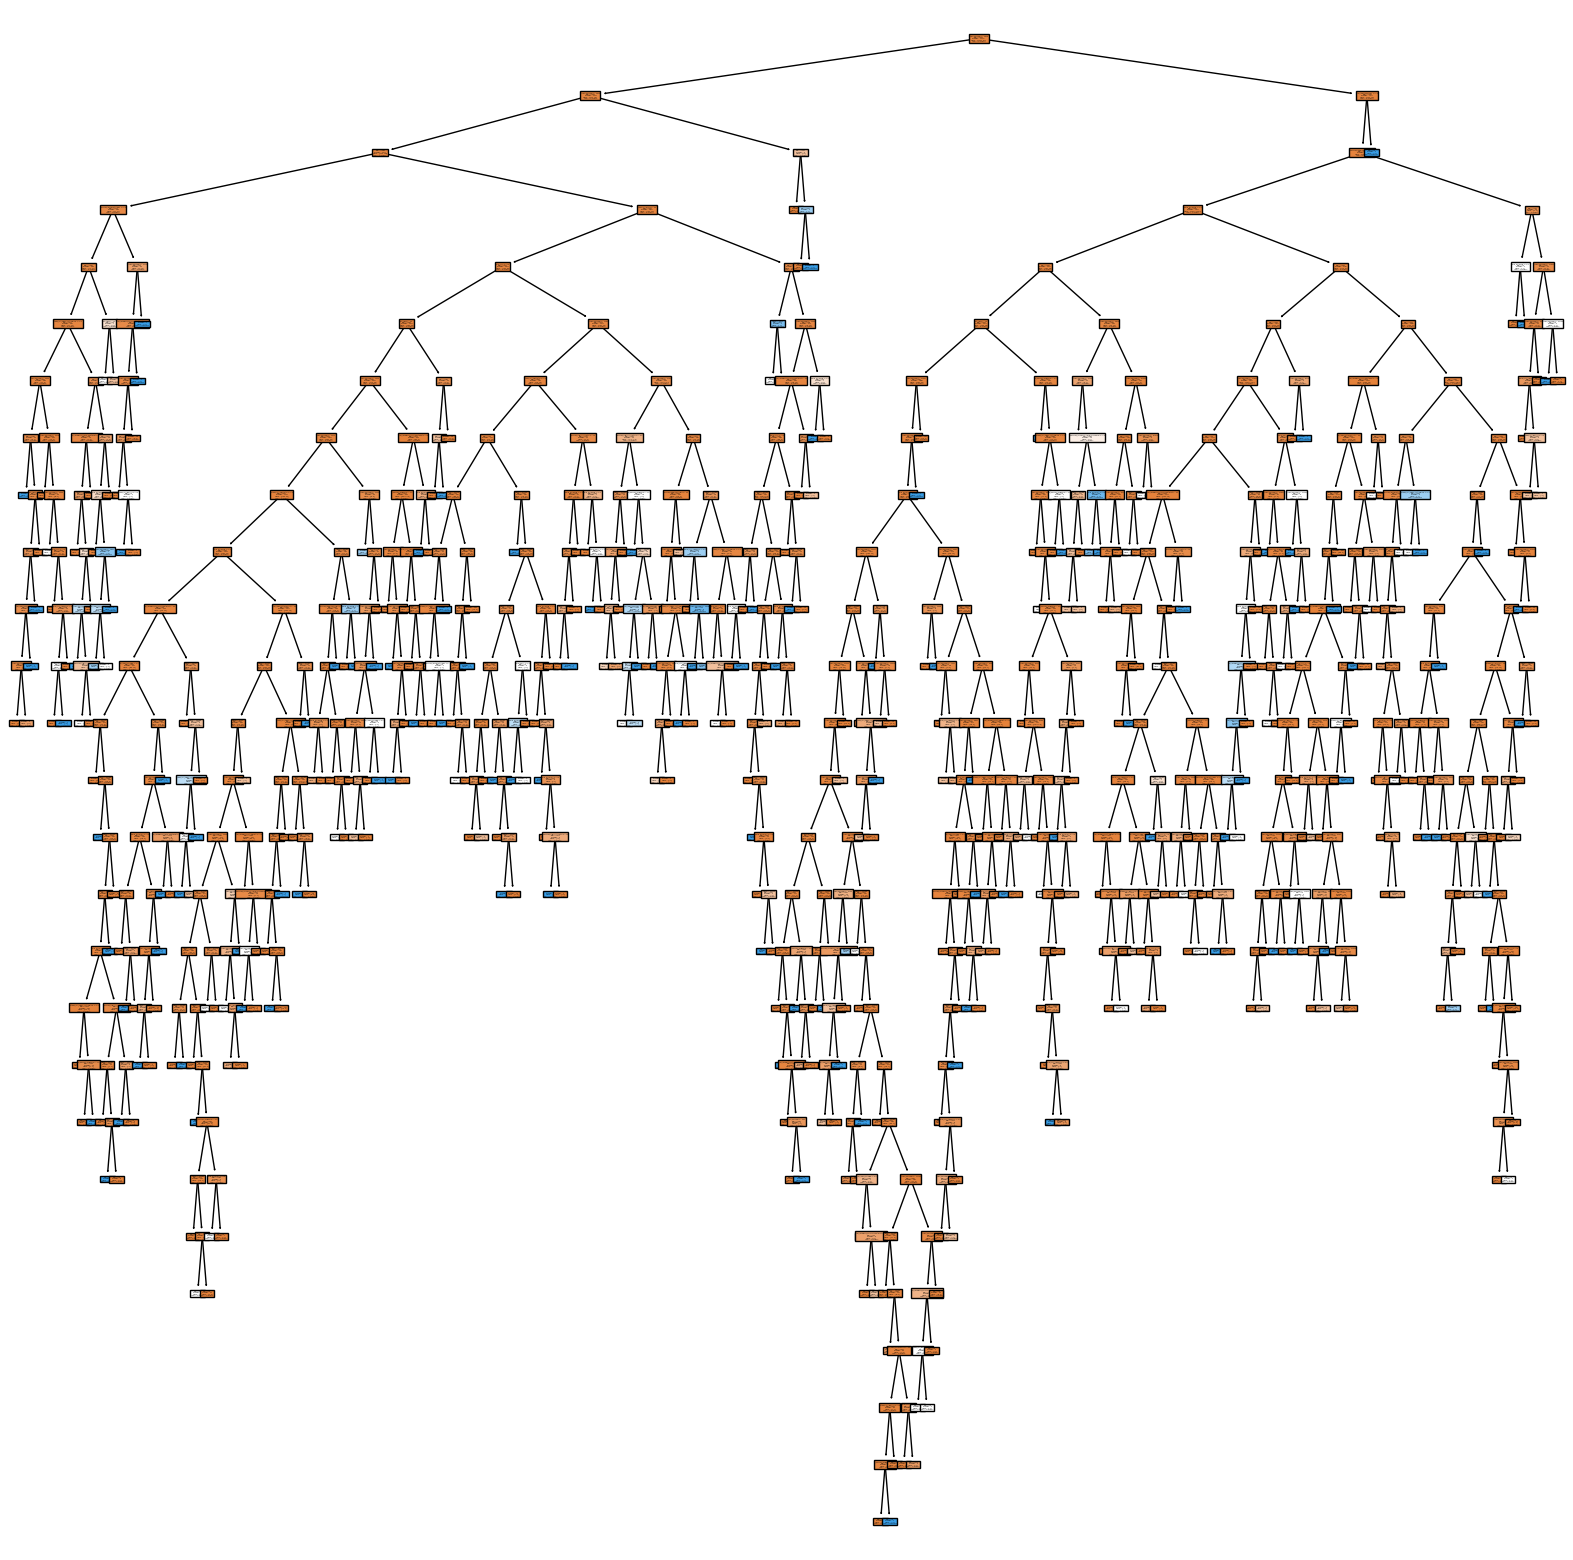

In [11]:
plt.figure(figsize=(20,20))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=x.columns
          )

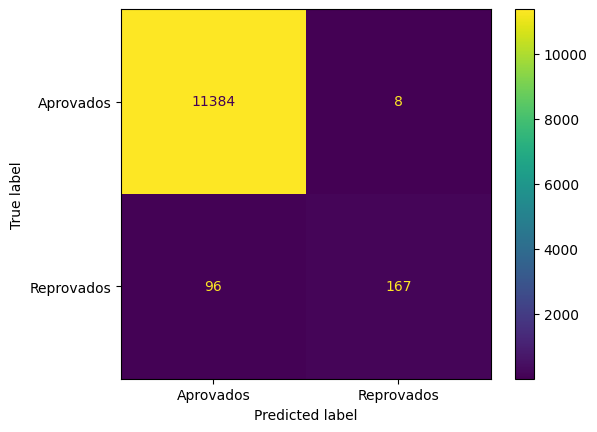

In [12]:
ConfusionMatrixDisplay.from_estimator(clf, x_train, y_train, display_labels=['Aprovados', 'Reprovados'])

In [13]:
predict = clf.predict(x_train)
accuracy_score(y_train, predict)

## Acredito que ele deu tão alto pois existem muitos aprovados, e acaba sendo muito fácil de acertar estes, e os não aprovados acabam sendo mais difíceis de acertar.
## Porém numa análise de crédito isso pode ser um risco muito grande.

0.991076791076791

In [14]:
y_train.value_counts(normalize=True)
## Acredito que balancear a base de dados seja deixar os dois valores mais aproximados um do outro, para não ter esse tipo de problema.
## Os aprovados representam quase 98% da base de dados.

mau
False    0.977435
True     0.022565
Name: proportion, dtype: float64

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [15]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_test, y_test)

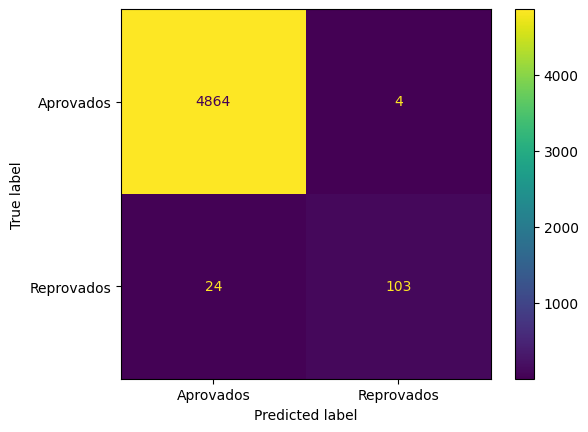

In [16]:
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [17]:
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.9943943943943944

In [18]:
## 4) 
clf = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
clf = clf.fit(x_train, y_train)


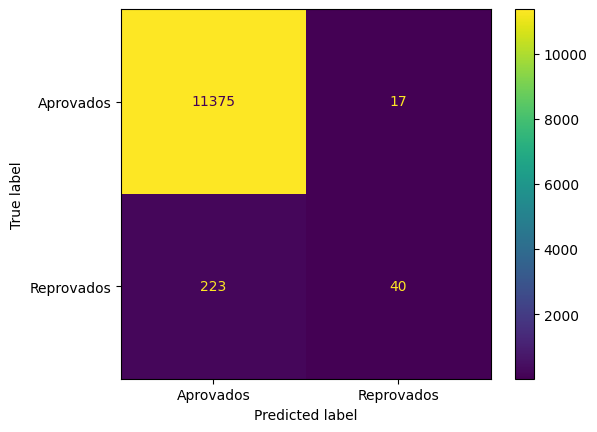

In [19]:
ConfusionMatrixDisplay.from_estimator(clf, x_train, y_train, display_labels=['Aprovados', 'Reprovados'])

## A utilização desse modelo, aparentemente seria destrutivo, pois onde ele deveria ser reprovado, acabou sendo aprovado
## Acarretaria em muitas liberações de credito para clientes reprovados.

In [20]:
predict = clf.predict(x_train)
accuracy_score(y_train, predict)

## Mesmo sendo uma % alta o modelo está inconsistente.

0.9794079794079794

In [21]:
print(f'Apenas {round((17+40)/(223+11375), 3)}% dos proponentes foram classificados como reprovados.')

Apenas 0.005% dos proponentes foram classificados como reprovados.


In [25]:
# 5)
total_contratos = len(y_test)
contratos_bons = (y_test == 0).sum()
acuracia_todos_bons = contratos_bons / total_contratos


In [26]:
print(f"Acurácia se classificássemos todos como 'bons': {acuracia_todos_bons:.4f}")

Acurácia se classificássemos todos como 'bons': 0.9746
